Dataset shape: (55692, 27)
   ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0      F   40         155          60       81.3             1.2   
1   1      F   40         160          60       81.0             0.8   
2   2      M   55         170          60       80.0             0.8   
3   3      M   40         165          70       88.0             1.5   
4   4      F   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0              1.0            1.0             1.0  ...        12.9   
1              0.6            1.0             1.0  ...        12.7   
2              0.8            1.0             1.0  ...        15.8   
3              1.5            1.0             1.0  ...        14.7   
4              1.0            1.0             1.0  ...        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  

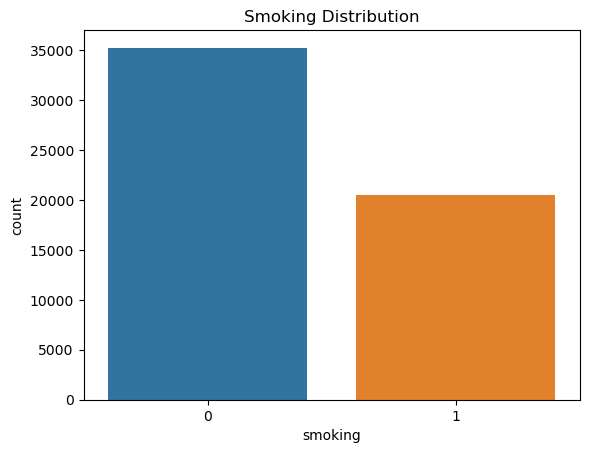


--- Logistic Regression ---
Accuracy: 0.7462967950444385
ROC AUC: 0.8282602642882372
Confusion Matrix:
 [[5427 1621]
 [1205 2886]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79      7048
           1       0.64      0.71      0.67      4091

    accuracy                           0.75     11139
   macro avg       0.73      0.74      0.73     11139
weighted avg       0.75      0.75      0.75     11139


--- Random Forest ---
Accuracy: 0.829966783373732
ROC AUC: 0.9153605121677079
Confusion Matrix:
 [[6026 1022]
 [ 872 3219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      7048
           1       0.76      0.79      0.77      4091

    accuracy                           0.83     11139
   macro avg       0.82      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139


Top 10 important features:
 gender      

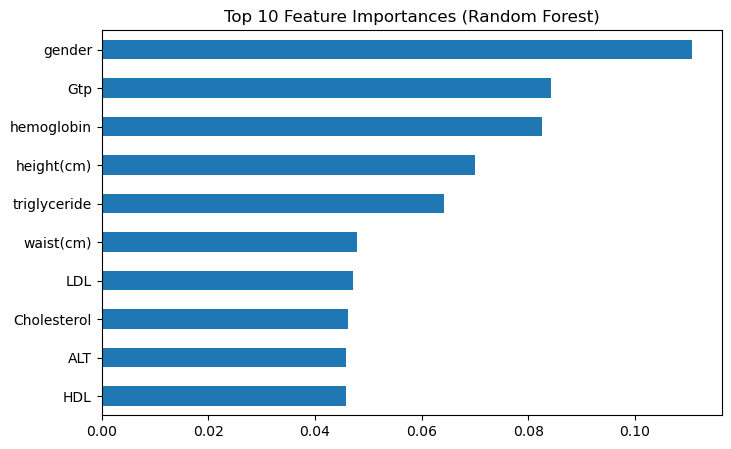

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

DATA_PATH = "/Users/ali/Downloads/find_smokers_by_vital_signs_dataset/smoking.csv"  


df = pd.read_csv(DATA_PATH, encoding="latin1", sep=",", on_bad_lines='skip')
print("Dataset shape:", df.shape)
print(df.head())


print("\nMissing values:\n", df.isnull().sum())
print("\nTarget distribution:\n", df['smoking'].value_counts())

sns.countplot(x='smoking', data=df)
plt.title("Smoking Distribution")
plt.show()

if 'ID' in df.columns:
    df = df.drop(columns=['ID'])

if 'gender' in df.columns:
    df['gender'] = df['gender'].map({'M': 1, 'F': 0})

df = pd.get_dummies(df, drop_first=True) 

imputer = SimpleImputer(strategy='median')
num_cols = df.drop(columns=['smoking']).select_dtypes(include=[np.number]).columns
df[num_cols] = imputer.fit_transform(df[num_cols])

X = df.drop(columns=['smoking'])
y = df['smoking']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 important features:\n", feat_importances.head(10))

plt.figure(figsize=(8,5))
feat_importances.head(10).sort_values().plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

